<a href="https://colab.research.google.com/github/Kanishk3813/Pathogen-Detection/blob/main/PathogenDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d kanishk3813/plant-disease

100% 1.72G/1.72G [00:21<00:00, 60.3MB/s]
100% 1.72G/1.72G [00:21<00:00, 87.5MB/s]


In [6]:
#Importing Libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras import layers
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout,AveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, GaussianNoise, GlobalMaxPooling2D
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

In [7]:
#Unzipping the file
import zipfile
zip_ref = zipfile.ZipFile('/content/plant-disease.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [21]:
#Loading the images
x_data= keras.utils.image_dataset_from_directory(
    directory = '/content/pathogen dataset',
    labels='inferred',
    label_mode = 'int',
    batch_size=100,
    image_size=(512,512)

)

Found 42257 files belonging to 2 classes.


In [22]:
#Loading the images
x_data= keras.utils.image_dataset_from_directory(
    directory = '/content/pathogen dataset/Test',
    labels='inferred',
    label_mode = 'int',
    batch_size=100,
    image_size=(512,512)

)

Found 8086 files belonging to 4 classes.


In [23]:
#Loading the images
x_data= keras.utils.image_dataset_from_directory(
    directory = '/content/pathogen dataset/Train',
    labels='inferred',
    label_mode = 'int',
    batch_size=100,
    image_size=(512,512)

)

Found 34171 files belonging to 4 classes.


In [11]:
train_ds =x_data

class_names = x_data.class_names
len(class_names)


4

In [12]:
class_names

['Bacteria', 'Fungi', 'Pests', 'Virus']

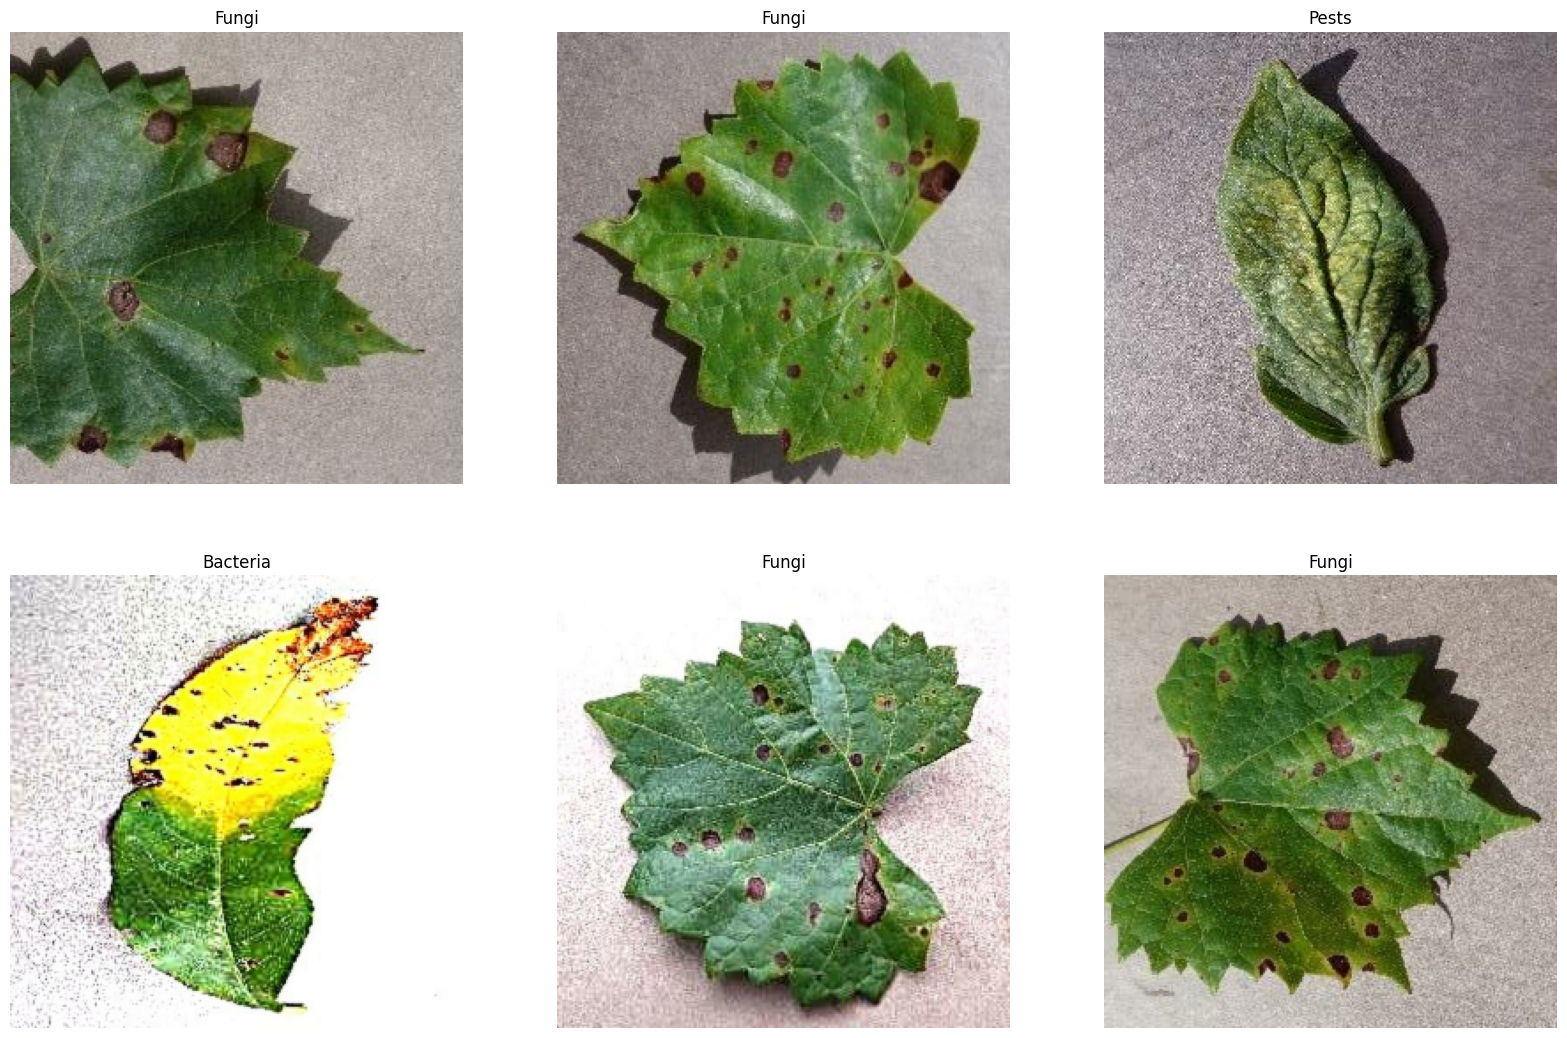

In [13]:
# Displaying a few sample images
plt.figure(figsize=(20, 20))
for images, labels in train_ds.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

In [15]:
input_shape = (512, 512, 3)

In [16]:
# Createing the base model
base_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=input_shape
)
base_model.trainable = False


94765736/94765736 [==============================] - 1s 0us/step


In [17]:
model = tf.keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(15, activation='softmax')
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 16, 16, 2048)      23587712  
                                                                 
 flatten (Flatten)           (None, 524288)            0         
                                                                 
 dense (Dense)               (None, 15)                7864335   
                                                                 
Total params: 31452047 (119.98 MB)
Trainable params: 7864335 (30.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________
